<center> <img src = https://static.tildacdn.com/tild3866-3832-4636-a265-656539366135/hh.jpg alt="drawing" style="width:500px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# параметры подключения. Работа с базой данных из Python. Удалить перед фиксированием!!!


In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишем запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# текст запроса
query_3_1 = f'''select
                  count(*) as "Количество вакансий"
                from 
                  public.vacancies
             '''

In [6]:
# результат запроса
count_vacancies = pd.read_sql_query(query_3_1, connection)
count_vacancies

,Количество вакансий
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [7]:
# текст запроса
query_3_2 = f'''select
                  count(*) as "Количество работодателей"
                from
                  public.employers  
             ''' 

In [8]:
# результат запроса
count_employers = pd.read_sql_query(query_3_2, connection)
count_employers

,Количество работодателей
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [9]:
# текст запроса
query_3_3 = f'''select
                  count(*) as "Количество регионов"
                from
                  public.areas  
             '''

In [10]:
# результат запроса
count_areas = pd.read_sql_query(query_3_3, connection)
count_areas

,Количество регионов
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [11]:
# текст запроса
query_3_4 = f'''select
                  count(*) as "Количество сфер деятельности"
                from
                  public.industries  
             '''

In [12]:
# результат запроса
count_industries = pd.read_sql_query(query_3_4, connection)
count_industries

,Количество сфер деятельности
0,294


***

Предварительный анализ показал, что в наших данных содержится 49129 вакансий из 294 различных сфер деятельности, их предоставляют 23501 работодатель.

Широкая география вакансий, в данных представлено 1362 города.

Из этого мы можем сделать вывод, что рынок труда динамичен, с большим разнообразием возможностей как для работодателей, так и для работников.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
query_4_1 = f'''select
                  a.name,
                  count(v.id)
                from
                  public.vacancies as v
                  join public.areas as a on v.area_id = a.id
                group by
                  a.name
                order by
                  2 desc 
                limit 5
            '''

In [14]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

,name,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query_4_2 = f'''select
                  COUNT(*)
                from
                  public.vacancies
                where
                  salary_from IS NOT NULL or salary_to IS NOT NULL  
            '''

In [16]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2.iloc[:, 0][0]

24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query_4_3 = f'''select
                  round(avg(salary_from)):: int as "Среднее нижней границы зарплатной вилки",
                  round(avg(salary_to)):: int as "Среднее верхней границы зарплатной вилки"
                from
                  public.vacancies  
            '''

In [18]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

,Среднее нижней границы зарплатной,Среднее верхней границы зарплатно
0,71065,110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
query_4_4 = f'''select
                  count(*) as "Количество вакансий",
                  schedule,
                  employment	
                from
                  public.vacancies
                group by 2, 3  
                order by count(*) desc
            '''

In [20]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

,Количество вакансий,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query_4_5 = f'''select
                  count(*) as "Кол-во вакансий",
                  experience
                from
                  public.vacancies
                group by experience
                order by count(*)  
            '''

In [22]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

,Кол-во вакансий,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

 Деталный анализ вакансий показал:

* Москва лидирует по количеству вакансий: Москва имеет значительно больше вакансий, чем другие города, включая Санкт-Петербург, который находится на втором месте.

* Много вакансий без указания зарплаты: Более половины всех вакансий не содержат информации о зарплате.

* Высокие средние значения зарплатной вилки: Средние значения нижней и верхней границ зарплатной вилки выше среднего по стране, что может указывать на высокие требования к вакансиям или высокий уровень оплаты труда в рассматриваемом сегменте.

* Предпочтение полной занятости и удаленной работе: Большинство вакансий предлагают полную занятость и работу на полный рабочий день. Также значительное количество вакансий предлагают удаленную работу.

* Популярность вакансий с опытом работы от 1 года до 3 лет: Вакансии, требующие опыта работы от 1 года до 3 лет, самые распространенные, в то время как вакансий, требующих опыта более 6 лет, значительно меньше.


Вывод: Рынок труда в рассматриваемом сегменте, вероятно, довольно активен, с высокими ожиданиями по оплате труда и предпочтением полной занятости и удаленной работы. Также есть спрос на квалифицированных специалистов с опытом работы от 1 года до 3 лет.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [23]:
# текст запроса
query_5_1 = f'''select
                  e.name,
                  count(*)
                from
                  public.EMPLOYERS as e
                  join public.vacancies as v on v.employer_id = e.id
                group by 1
                order by 2 desc 
                limit 5     
            '''

In [24]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1

,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [25]:
# текст запроса
query_5_2 = f'''select
                  a.name as "Регион",
                  count(e.name) as "Работодатели",
                  count(v.id) as "Вакансии"
                from
                  public.areas as a
                  left join public.vacancies as v on v.area_id = a.id
                  left join public.employers as e on e.area = a.id
                where v.id is null    
                group by 1
                order by 2 desc
                limit 1  
            '''

In [26]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

,Регион,Работодатели,Вакансии
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [27]:
# текст запроса
query_5_3 = f'''select
                  count(distinct v.area_id) as "Кол-во регионов",
                  e.name as "Работодатель"
                from
                  public.employers as e
                  join public.vacancies as v on v.employer_id = e.id
                group by 2
                order by 1 desc    
            '''

In [28]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

,Кол-во регионов,Работодатель
0,181,Яндекс
1,152,Ростелеком
2,116,Спецремонт
3,88,Поляков Денис Иванович
4,71,ООО ЕФИН
...,...,...
14761,1,UniSol
14762,1,UNISTORY LLC
14763,1,UNIT6
14764,1,United Distribution


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [29]:
# текст запроса
query_5_4 = f'''select count(*) as "Кол-во работодателей, у которых не указана сфера деятельности"
                from
                  public.employers_industries as ei
                  right join public.employers as e on e.id = ei.employer_id
                where ei.employer_id is null  
            '''

In [30]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

,"Кол-во работодателей, у которых не"
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [31]:
# текст запроса
query_5_5 = f'''select
                  e.name as "Название",
                  count(distinct industry_id) as "Кол-во сфер деятельности"
                from
                  public.employers as e
                  left join public.employers_industries as ei on ei.employer_id = e.id
                group by e.name
                having
                  count(distinct industry_id) = 4    
                order by 1
                offset 2 limit 1 
            '''

In [32]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

,Название,Кол-во сфер деятельности
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [33]:
# текст запроса
query_5_6 = f'''select
                 count(*) as "Количество"
                from
                  public.employers_industries as ei
                  join public.employers as e on e.id = ei.employer_id
                  join public.industries as i on i.id = ei.industry_id
                where
                  i.name = 'Разработка программного обеспечения'  
            '''

In [34]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

,Количество
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [35]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup

url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
# Выполняем GET-запрос, содержимое ответа присваивается переменной response
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).text  
# Создаём объект BeautifulSoup, указывая html-парсер
page = BeautifulSoup(response, 'html.parser')
# Используем метод select(), в аргументы передаем CSS-селектор, который ищет все элементы <a> во второй таблице страницы  
hyperlinks = page.select('div table:nth-of-type(2) tbody tr td > a')
# Извлекаем текст и создаем список городов
million_cities = [hyperlink.text for hyperlink in hyperlinks]
display(million_cities)

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [36]:
# текст запроса
# Преобразовываем список городов в строку, чтобы использовать в запросе
million_cities_str = "','".join(million_cities)

query_5_7 = f'''select
                  a.name as "Город",
                  count(distinct v.id) as "Кол-во вакансий Яндекс"
                from
                  public.vacancies as v
                  join public.areas as a on a.id = v.area_id
                  join public.employers as e on e.id = employer_id
                where
                  e.name = 'Яндекс'
                   and a.name in ('{million_cities_str}')
                group by
                  a.name
                
                
                UNION
                
                select
                  'Total' as "Город",
                  count(*)
                from
                  public.vacancies as v
                  join public.areas as a on a.id = v.area_id
                  join public.employers as e on e.id = employer_id
                where
                  e.name = 'Яндекс'
                  and a.name in ('{million_cities_str}')
                order by 2             
            '''

In [37]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7

,Город,Кол-во вакансий Яндекс
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

Проанализоровав работодателей, мы узнали:
* Компания "Яндекс" является лидером по количеству размещенных вакансий на сайте hh.ru, их число составляет 1933, что значительно превышает количество вакансий у других работодателей.
* "Яндекс" также представлен в наибольшем количестве населенных пунктов - 181, что говорит о широком географическом охвате деятельности компании.
* Значительная часть работодателей (8419 из 23501) не указывает сферу своей деятельности, что может затруднять поиск работы для соискателей.
* 3553 компании указали сферу деятельности как разработку программного обеспечения, что свидетельствует о высоком спросе на специалистов в этой области.
* "Яндекс" также активен на рынке городов-миллионеров, предлагая 485 вакансий, преимущественно в Москве (54 вакансии) и Санкт-Петербурге (42 вакансии), что подчеркивает их интерес к крупным городам с развитой экономикой и кадровым потенциалом.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [38]:
# текст запроса
query_6_1 = f'''select
                  count(*)
                from
                  public.vacancies as v
                where
                  lower(v.name) like '%data%'
                  or lower(v.name) like '%данн%'     
            '''

In [39]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
print(f'{df_6_1.iloc[0,0]} вакансий имеют отношение к данным.')

1771 вакансий имеют отношение к данным.


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [40]:
# текст запроса
query_6_2 = f'''select
                  count(*)
                from
                  public.vacancies as v
                where
                  (lower(v.name) like '%data scientist%' or
                  lower(v.name) like '%data science%' or
                  lower(v.name) like '%исследователь данных%' or
                  lower(v.name) like '%machine learning%' or 
                  lower(v.name) like '%машинн%обучен%%' or
                  (v.name like '%ML%' and v.name not like '%HTML%')) and
                  (lower(v.name) like '%junior%' or
                  v.experience = 'Нет опыта' or
                  v.employment = 'Стажировка')
                      
            '''

In [41]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
print(f'Количество подходящих вакансий для начинающего дата-сайентиста, составляет: {df_6_2.iloc[0, 0]} шт.')

Количество подходящих вакансий для начинающего дата-сайентиста, составляет: 51 шт.


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [42]:
# текст запроса
query_6_3 = f'''select
                  count(*)
                from
                  public.vacancies as v
                where
                  (lower(v.name) like '%data scientist%' or
                  lower(v.name) like '%data science%' or
                  lower(v.name) like '%исследователь данных%' or
                  lower(v.name) like '%machine learning%' or 
                  lower(v.name) like '%машинн%обучен%%' or
                  (v.name like '%ML%' and v.name not like '%HTML%')) and
                  (v.key_skills ilike '%SQL%' or
                  v.key_skills ilike '%postgres%')     
            '''

In [43]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
print(f'Количество вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres: {df_6_3.iloc[0, 0]} шт.')

Количество вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres: 201 шт.


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [44]:
# текст запроса
query_6_4 = f'''select
                  count(*)
                from
                  public.vacancies as v
                where
                  (v.name ilike '%data scientist%' or
                  v.name ilike '%data science%' or
                  v.name ilike '%исследователь данных%' or
                  v.name ilike '%machine learning%' or 
                  v.name ilike '%машинн%обучен%%' or
                  (v.name like '%ML%' and v.name not like '%HTML%')) and
                  (v.key_skills ilike '%Python%')         
            '''

In [45]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
print(f'Количество вакансий, в которых в качестве ключевого навыка указан Python: {df_6_4.iloc[0, 0]} шт.')

Количество вакансий, в которых в качестве ключевого навыка указан Python: 351 шт.


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [46]:
# текст запроса

# В блоке select, считаем среднее количество слов, для этого мы применяем функцию length к столбцу key_skills, получаем
# кол-во символов в строке, из этого вычитаем кол-во символов строки, в которой мы заменили, с помощью replace, символы табуляции
# на пустые строки, эта разница покажет нам сколько символов табуляции в строке, чтобы корректно посчитать кол-во слов в строке,
# прибавляем 1, т.к в конце строки табуляции нет, значит слов на один больше, чем символов табуляции.
# К полученному результату применяем функцию avg(вычисляет среднее) и округляем до двух символов после запятой.  
query_6_5 = f'''select 
                  round(avg(length(key_skills) - length(replace(key_skills, '\t', '')) + 1), 2) as "Среднее кол-во навыков для DS"
                from
                  public.vacancies as v
                where
                  (v.name ilike '%data scientist%' or
                  v.name ilike '%data science%' or
                  v.name ilike '%исследователь данных%' or
                  v.name ilike '%machine learning%' or 
                  v.name ilike '%машинн%обучен%%' or
                  (v.name like '%ML%' and v.name not like '%HTML%'))       
            '''

In [114]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
print(f'{df_6_5.iloc[0, 0]} ключевых навыков в среднем указывают в вакансиях для DS')

6.41 ключевых навыков в среднем указывают в вакансиях для DS


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [48]:
# текст запроса
# вычисляем среднее значение заработной платы для вакансий, учитывая как минимальную, так и максимальную заработную плату.
# Функция coalesce используется для выбора непустого значения из двух аргументов. Затем производится суммирование
# минимальной и максимальной заработной платы, деление этой суммы на 2, и округление результата до ближайшего целого числа.
# Затем приводим к типу int.
query_6_6 = f'''select 
                  v.experience as "Опыт работы",
                  round(avg((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from)) / 2))::int as "Средняя зарплата DS"
                from
                  public.vacancies as v
                where
                  (v.name ilike '%data scientist%' or
                  v.name ilike '%data science%' or
                  v.name ilike '%исследователь данных%' or
                  v.name ilike '%machine learning%' or 
                  v.name ilike '%машинн%обучен%%' or
                  (v.name like '%ML%' and v.name not like '%HTML%')) and
                  (salary_from IS NOT NULL or salary_to IS NOT NULL)
                group by 
                  v.experience         
            '''

In [49]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

,Опыт работы,Средняя зарплата DS
0,Нет опыта,74643
1,От 1 года до 3 лет,139675
2,От 3 до 6 лет,243115


***

Выводы по предметному анализу:
* Вакансий, связанных с обработкой данных, немало - 1771 из 49197.
* Для начинающего дата-саентиста есть 51 подходящая вакансия.
* Для дата-саентистов с упоминанием SQL или PostgreSQL в ключевых навыках доступно 201 вакансия.
* Python является одним из самых востребованных навыков для дата-саентистов, упоминается в 351 вакансии.
* Среднее количество ключевых навыков в вакансиях для дата-саентистов составляет 6.41.
* Средняя зарплата дата-саентиста значительно различается в зависимости от опыта работы: 74643 для начинающих, 139675 для специалистов с опытом от 1 до 3 лет и 243115 для специалистов с опытом от 3 до 6 лет.


Таким образом, можно сделать вывод, что область данных востребована на рынке труда, особенно вакансии, требующие опыта работы и специализированных навыков, таких как Python и SQL. Зарплаты в этой области также могут значительно различаться в зависимости от уровня опыта.



# 7. Дополнительные исследования данных

1. Узнаем каких вакансий больше всего.

Посмотром на топ-25.

In [100]:
# текст запроса
query_7_1 = f'''select
                  v.name as "Вакансия",
                  count(*)
                from
                  public.vacancies as v
                group by 1
                order by 2 desc
                limit 25    
            '''

In [101]:
# результат запроса
df_7_1 = pd.read_sql_query(query_7_1, connection)
df_7_1



,Вакансия,count
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
5,Аналитик,404
6,Инженер-программист,389
7,Программист 1C,360
8,Frontend-разработчик,242
9,Инженер технической поддержки,230


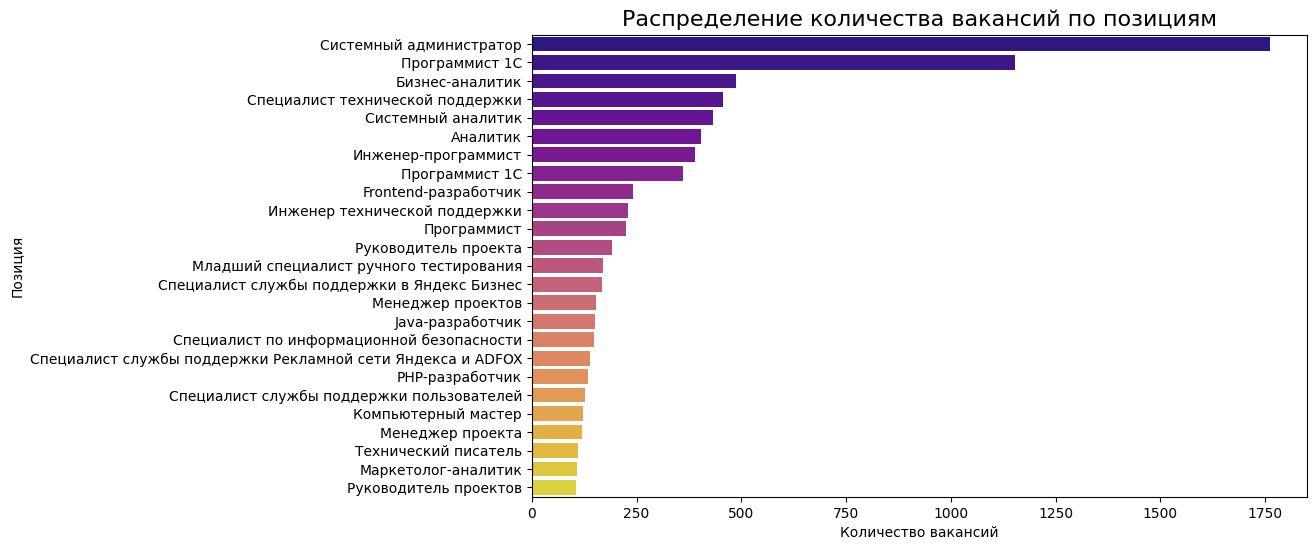

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_7_1, x="count", y="Вакансия", palette="plasma")

# Настройка заголовка и меток осей
plt.title("Распределение количества вакансий по позициям", fontsize=16)
plt.xlabel("Количество вакансий")
plt.ylabel("Позиция");

Исходя из данных в этой таблице, можно сделать следующие выводы:

* Системный администратор, Программист 1С и Бизнес-аналитик - самые востребованные позиции среди вакансий, представленных на рассматриваемом ресурсе.
* Позиции, связанные с информационными технологиями (IT), такие как программирование (Программист, Java-разработчик, PHP-разработчик, Frontend-разработчик), а также техническая поддержка (Специалист технической поддержки, Инженер технической поддержки), имеют немалое количество вакансий.
* Специалисты по аналитике (Бизнес-аналитик, Аналитик, Маркетолог-аналитик) также востребованы на рынке труда.
* Позиции в сфере управления проектами (Руководитель проекта, Менеджер проекта) имеют некоторое количество вакансий, что указывает на активность в этой области.
* Позиция "Программист 1С" задублирована, это может быть связано с различными способами написания позиции или разными вариантами объявлений.
* Специалисты службы поддержки также имеют немалое количество вакансий, что свидетельствует о значимости этой сферы в современном бизнесе.

Эта таблица может помочь и соискателям, и работодателям в понимании текущего состояния рынка труда и ориентации при поиске вакансий или кадров.

***

2. Оценка заработной платы в различных отраслях.

Находим топ-9 отраслей по средней заработной плате.

Берем только те вакансии, в которых заполнено хотя бы одно поле с заработной платой.

In [95]:
# текст запроса
# Так как в таблице vacancies нет ключа, чтобы объединить ее с таблицей industries, мы в подзапросе объединяем industries
# с employers_industries, а затем полученную таблицу объединяем с vacancies по ключу employer_id
query_7_2 = f'''select
                  ind.name as "Индустрия",
                  round(avg((coalesce(v.salary_from, v.salary_to) + coalesce(v.salary_to, v.salary_from)) / 2))::int as "Средняя зп"
                from 
                  public.vacancies as v
                  join (select *
                        from
                          public.employers_industries ei
                          join public.industries i on i.id=ei.industry_id) as ind on ind.employer_id = v.employer_id
                where
                  v.salary_from IS NOT NULL or v.salary_to IS NOT NULL
                group by 1
                order by 2 desc
                limit 9   
            '''

In [96]:
# результат запроса
df_7_2 = pd.read_sql_query(query_7_2, connection)
df_7_2

,Индустрия,Средняя зп
0,"Агрохимия (продвижение, оптовая торговля)",381429
1,Агрохимия (производство),339875
2,Игорный бизнес,191905
3,Корма для животных (производство),168300
4,Зоомагазин,167613
5,Кадровые агентства,144530
6,"Лакокрасочная продукция, сырье (производство)",142803
7,"Бытовая химия, парфюмерия, косметика (произво...",130120
8,"Лакокрасочная продукция, сырье (продвижение, о...",128445


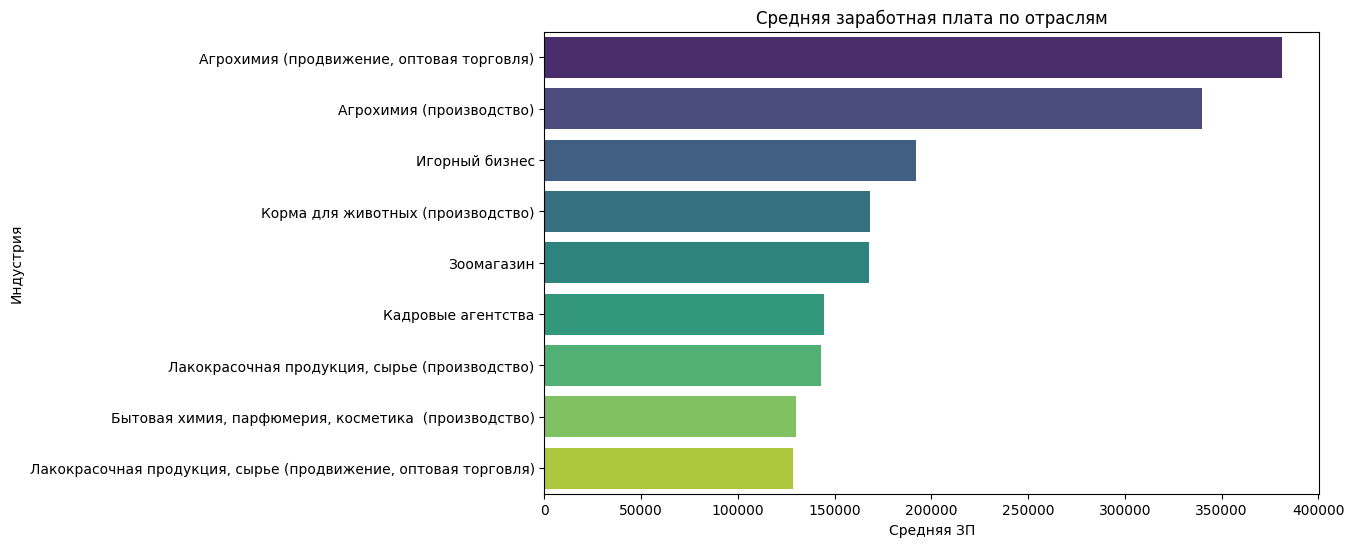

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_7_2, x='Средняя зп', y='Индустрия',  palette='viridis')

# Настройка заголовка и меток осей
plt.xlabel('Средняя ЗП')
plt.ylabel('Индустрия')
plt.title('Средняя заработная плата по отраслям');

Вывод:
Такая высокая средняя заработная плата в данных областях может говорить о том, что эти отрасли нуждаются, в основном, в высококвалифицированных специалистах.

 

***

3. Востребованность удаленной работы.

Исследование количества вакансий, предлагаемых в удаленном формате, и их распределение по отраслям и регионам.

Возьмем топ-10 по количеству вакансий.


In [105]:
# текст запроса
query_7_3 = f'''select 
                  count(*) as "Кол-во вакансий",
                  a.name as "Город",
                  ind.name as "Сфера деятельности" 
                from
                  public.vacancies as v
                  join (select *
                        from
                          public.employers_industries ei
                          join public.industries i on i.id=ei.industry_id) as ind on ind.employer_id = v.employer_id
                  join public. areas a on a.id = v.area_id
                where
                  v.schedule = 'Удаленная работа'  
                group by 2, 3  
                order by 1 desc  
                limit 15           
            '''

In [106]:
# результат запроса
df_7_3 = pd.read_sql_query(query_7_3, connection)
df_7_3

,Кол-во вакансий,Город,Сфера деятельности
0,305,Москва,Разработка программного обеспечения
1,253,Москва,"Системная интеграция, автоматизации технологи..."
2,191,Минск,Разработка программного обеспечения
3,187,Москва,"Интернет-компания (поисковики, платежные систе..."
4,159,Алматы,Разработка программного обеспечения
5,156,Санкт-Петербург,Разработка программного обеспечения
6,145,Новосибирск,Разработка программного обеспечения
7,142,Нижний Новгород,Разработка программного обеспечения
8,141,Алматы,"Системная интеграция, автоматизации технологи..."
9,132,Нур-Султан,Разработка программного обеспечения


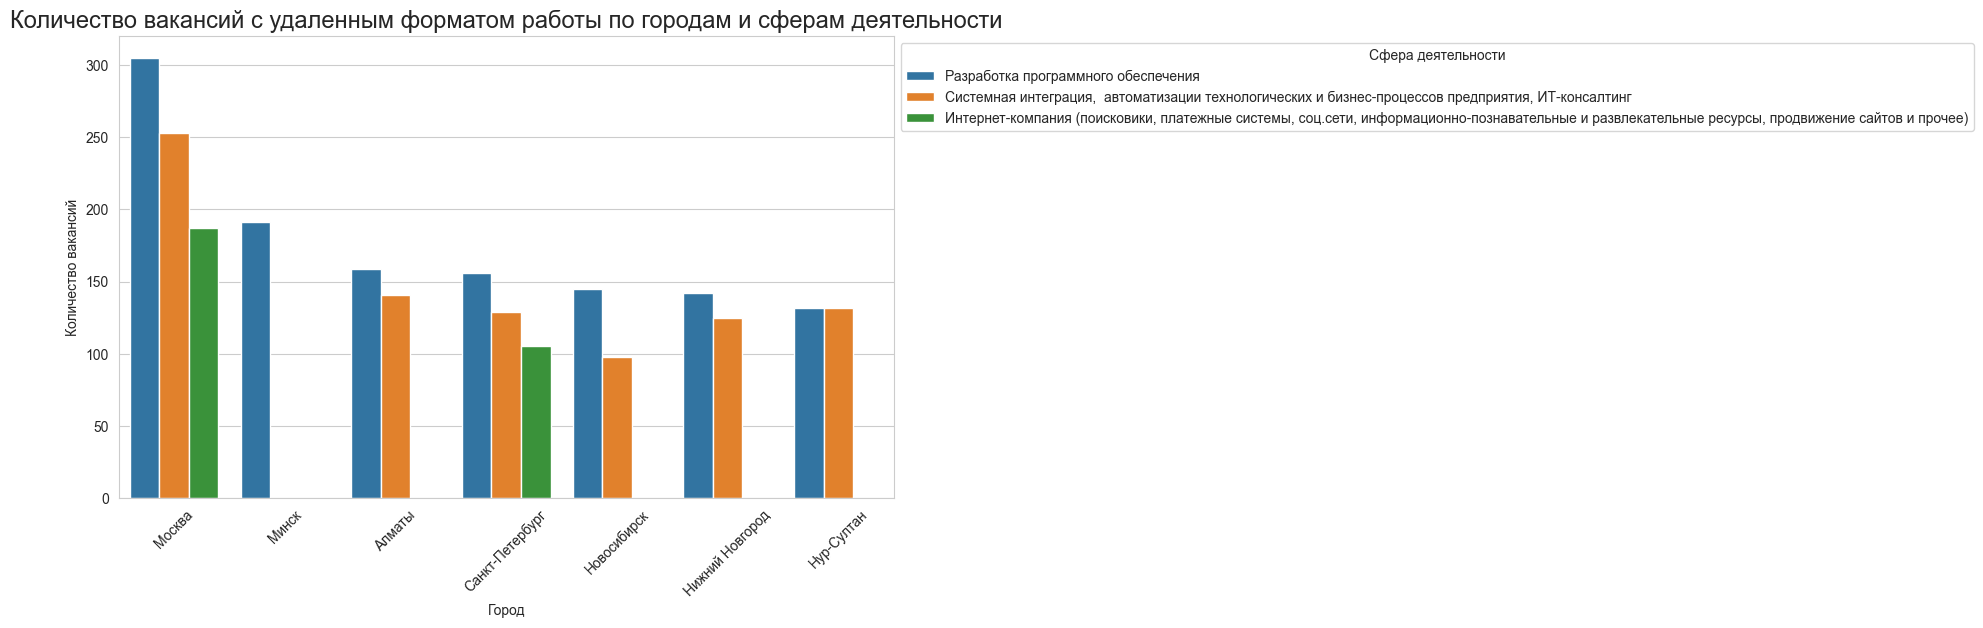

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_7_3, x='Город', y='Кол-во вакансий', hue='Сфера деятельности')

# Настройка заголовка и меток осей
plt.title('Количество вакансий с удаленным форматом работы по городам и сферам деятельности', fontsize=17)
plt.xlabel('Город')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.legend(title='Сфера деятельности', bbox_to_anchor=(1, 1))
plt.tight_layout();

Выводы:

* Москва и Санкт-Петербург являются лидерами по количеству вакансий с удаленной формой работы. Это может указывать на высокую концентрацию IT-компаний и компаний, готовых предоставить возможность удаленной работы в этих городах.

* Сфера деятельности, где удаленная работа наиболее распространена, - разработка программного обеспечения и системная интеграция, автоматизации технологий. Это свидетельствует о том, что в этих областях востребованы специалисты, которые могут эффективно работать удаленно.

* Города Минск, Нур-Султан, Нижний Новгород и Новосибирск также имеют значительное количество вакансий с удаленной формой работы, что может указывать на развитие IT-сферы и готовность компаний в этих регионах к работе с удаленными сотрудниками.

* В целом, данные свидетельствуют о том, что удаленная работа становится все более популярной и доступной для специалистов в IT-сфере, и это открывает дополнительные возможности для поиска работы и трудоустройства, особенно для тех, кто живет в регионах, где меньше традиционных IT-центров.

***

4. Определим сферы деятельности, в которых от кандидатов требуется большее количество навыков.

Узнаем среднее количество навыков для каждой сферы деятельности, и сколько вакансий у нас имеется из данной области, отсортируем по убыванию количества навыков.

In [141]:
# текст запроса
query_7_4 = f'''select
                  ind.name as "Сфера деятельности",
                  count(*) as "Кол-во вакансий",
                  round(avg(length(v.key_skills) - length(replace(v.key_skills, '\t', '')) + 1), 1) as "Среднее кол-во навыков"
                from
                  public.vacancies as v
                  join (select *
                        from
                          public.employers_industries ei
                          join public.industries i on i.id=ei.industry_id) as ind on ind.employer_id = v.employer_id
                group by
                  ind.name
                order by
                  3 desc   
            '''

In [142]:
# результат запроса
df_7_4 = pd.read_sql_query(query_7_4, connection)
df_7_4

,Сфера деятельности,Кол-во вакансий,Среднее кол-во навыков
0,Продюсерский центр,46,10.8
1,Корма для животных (производство),41,9.4
2,Зоомагазин,42,9.4
3,Консервированная продукция (производство),36,9.3
4,Услуги по организации поездок и бронированию,51,8.9
...,...,...,...
288,Сахар (производство),21,4.9
289,Судоремонт,7,4.8
290,"Продукция судостроения (продвижение, оптовая т...",10,4.6
291,"Оборудование для деревообработки, заготовки ле...",9,4.6


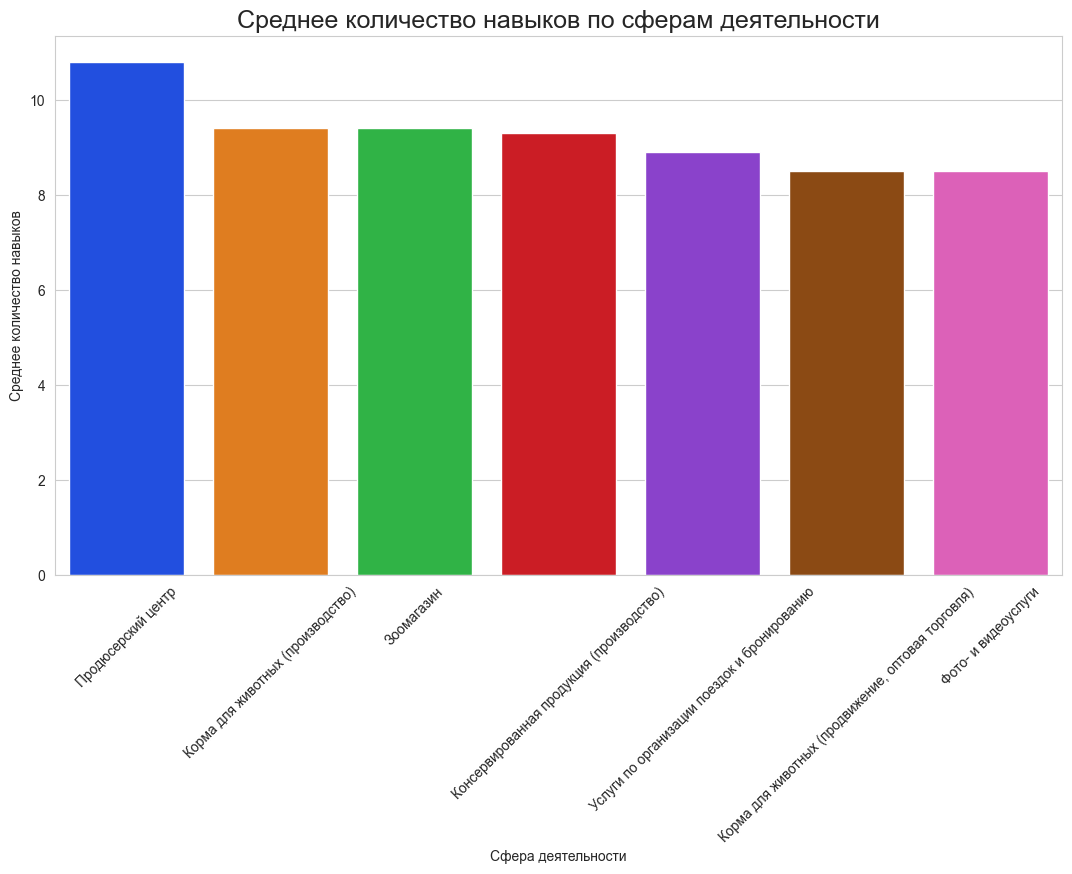

In [158]:
plt.figure(figsize=(13, 7))
# для наглядности графика, возьмем только топ-7 сфер деятельности 
sns.barplot(data=df_7_4.head(7) ,x="Сфера деятельности", y="Среднее кол-во навыков", palette='bright')

# Настройка осей и заголовка
plt.xlabel("Сфера деятельности")
plt.xticks(rotation=45)
plt.ylabel("Среднее количество навыков")
plt.title("Среднее количество навыков по сферам деятельности", fontsize=18);


Вывод:

Сферы деятельности, такие как "Продюсерский центр", "Корма для животных (производство)" и "Зоомагазин", требуют от кандидатов наибольшее среднее количество навыков (10.8, 9.4 и 9.4 соответственно). Это может указывать на высокую степень комплексности и требовательности к вакансиям в этих сферах, в этих сферах существует активный спрос на специалистов с широким набором навыков.

Сферы деятельности, такие как "Судоремонт" и "Продукция судостроения (продвижение, оптовая торговля)", имеют низкое количество вакансий и низкое среднее количество требуемых навыков. Это может свидетельствовать о меньшей конкуренции на рынке труда в этих областях и более специализированных требованиях к кандидатам, а так же о том что эти сферы нуждаются в более узконаправленных специалистах.



***

# Общий вывод по проекту

Проведенное исследование вакансий предоставило ценную информацию о текущем состоянии рынка труда в определенном сегменте. В ходе анализа были выявлены несколько ключевых моментов:

1. Вакансии, связанные с обработкой и анализом данных, выделяются на фоне других сфер деятельности. Это объясняется широким использованием данных в современном мире, особенно в контексте развития цифровой экономики и технологий. Поэтому специалисты в области данных, такие как аналитики данных, инженеры по анализу данных и специалисты по машинному обучению, востребованы на рынке труда.

2. Москва является лидером по количеству вакансий, что может быть объяснено ее статусом крупного экономического и культурного центра, а также местоположением офисов многих крупных компаний. Санкт-Петербург также имеет значительное количество вакансий, но чуть меньше по сравнению с Москвой. В других городах число вакансий обычно ниже, что может быть связано с меньшим размером и развитием экономики этих регионов. Однако широкая география вакансий указывает на динамичность и разнообразие рынка труда.

3. Наличие вакансий в удаленном формате указывает на то, что работодатели всё более открыты к удаленной работе, что может быть связано с развитием технологий информационной связи и увеличением количества проектов, в которых удаленная работа возможна.

4. Важными требованиями для соискателей являются знание Python, SQL. Это отражает актуальные тенденции в сфере информационных технологий и аналитики данных. Среднее количество ключевых навыков в вакансиях подтверждает высокие стандарты, предъявляемые к потенциальным кандидатам.

5. Средняя зарплата дата-саентиста варьируется в зависимости от опыта работы, причем средние значения превышают средний уровень оплаты труда в стране. Это свидетельствует о высокой востребованности специалистов в этой области и готовности работодателей предложить конкурентоспособные условия.

6. Работодатель "Яндекс" выделяется на фоне других компаний по количеству размещенных вакансий и географическому охвату. Это указывает на высокий статус и значимость компании на рынке труда.

7. Среди востребованных должностей преобладают позиции в IT-сфере, такие как системный администратор, программисты различных направлений, бизнес-аналитики и аналитики. Это свидетельствует о значимости цифровизации и автоматизации бизнес-процессов для современных компаний и о необходимости квалифицированных специалистов для поддержания и развития информационной инфраструктуры.

8. Сферы деятельности с высоким средним количеством требуемых навыков, такие как "Продюсерский центр" и "Зоомагазин", могут представлять интерес для специалистов с широким набором компетенций. В то время как сферы с более специализированными требованиями, например, "Судоремонт" и "Продукция судостроения", могут быть привлекательны для специалистов с узконаправленными навыками.

В целом, данные позволяют сделать вывод о динамичности и разнообразии рынка труда, с активной конкуренцией в IT-сфере и повышенными требованиями к специалистам в некоторых отраслях. Это подчеркивает важность непрерывного обучения и развития профессиональных навыков для успешной карьеры в современном мире.


Прогноз:

С учетом растущего количества данных, в том числе в сферах e-commerce, медицины, финансов и других, спрос на специалистов в области данных, в том числе аналитиков данных и специалистов по машинному обучению, вероятно, будет продолжать расти.
Удаленная работа, особенно в сфере информационных технологий и связанных с ними отраслях, будет оставаться популярной и, возможно, будет даже расширяться в будущем, что может привести к изменениям в организации работы и структуре занятости.
С увеличением числа вакансий в сфере данных ожидается также рост конкуренции среди соискателей на эти позиции, что может повлиять на требования к квалификации и уровень оплаты труда.